Установка необходимых пакетов и импорт библиотек

In [1]:
!pip install anndata
!pip install scanpy
!pip install matplotlib==3.1.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 6.4 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=2d104421ca601fb3506447056a56a4160712c8105ee19592f5ddba8efbff66c8
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 MB 21.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.1.3-cp310-cp31

In [2]:
import os
import pandas as pd
from tqdm.notebook import tqdm
import seaborn as sns; sns.set_theme()
import numpy as np
import matplotlib.pyplot as plt
import anndata as ad
import scanpy as sc
from matplotlib.cm import get_cmap
from matplotlib.colors import ListedColormap

# Шаг 1 Загружаем файлы
Скачиваем отдельные файлы с каунтами из датасета - https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE103967

Нас интересуют файлы, соответсвующие клеткам "CD45- Epcam+ (4-6 weeks)

In [3]:
# Download CD45- EpCAM+ cells
gsm_list = [
            ('7017', '1395'),
            ('7018', '1396'),
            ('7019', '1398'),
            ('7020', '1458'),
            ('7021', '1459'),
            ('7022', '1539'),
            ('7023', '1540'),
            ('7024', '1541'),
            ('7025', '1542'),
            ('7026', '1544'),
            ('7027', '1545'),
            ('7028', '1546'),
            ('7029', '1646'),
            ('7030', '1647'),
            ('7031', '1648'),
            ('7032', '1649'),
            ('7033', '1751'),
            ('7034', '1753'),
            ('7035', '1792'),
            ('7036', '1793'),
            ('7037', '1795'),
]

for gsm, ab in gsm_list:
    os.system(f"wget -c -nv 'https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM278{gsm}/suppl/GSM278{gsm}_AB{ab}.txt.gz' -O 'AB{ab}.txt.gz'")
    os.system(f"gzip -f -d AB{ab}.txt")

# Шаг 2 Объединяем все файлы в один
В итоге получается 1 большая матрица размером 34016 rows × 8064 columns

In [4]:
counts = {}
i = 0
for gsm, ab in gsm_list:
    if i == 0:
        counts = pd.read_csv(f'AB{ab}.txt', sep='\t')
    else:
        temp = pd.read_csv(f'AB{ab}.txt', sep='\t')
        counts = pd.concat([counts, temp], axis=1)
    i += 1

counts

,W291665,W291666,W291667,W291668,W291669,W291670,W291671,W291672,W291673,W291674,...,W432007,W432008,W432009,W432010,W432011,W432012,W432013,W432014,W432015,W432016
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007C21Rik,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007L01Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
0610007P08Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Шаг 3 Экспрессия маркерных генов

Сопоставляем ID-шники клеток (столцы в файлах из GEO) с ID-шниками от авторов (https://drive.google.com/file/d/1OaqaGULwMUlQ7SkdADOFMW5NrQbGtA3G/view?usp=sharing) -- они должны совпадать. Дальше работаем только с клетками из файла авторов.




In [5]:
!gdown --id 1OaqaGULwMUlQ7SkdADOFMW5NrQbGtA3G

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1OaqaGULwMUlQ7SkdADOFMW5NrQbGtA3G
To: /content/thymus_epithel_clusts.txt
100% 42.8k/42.8k [00:00<00:00, 59.5MB/s]


In [43]:
data = pd.read_csv(f'thymus_epithel_clusts.txt', sep='\t', index_col = 0)
data = data.T

data_list = list(data.keys())
counts_list = list(counts.keys())


dict_ = {}
temp = []

for el in counts_list:
    if el in data_list:
        temp.append(el)

counts = counts[temp]

groups = []

for el in counts_list:
    if el in data_list:
        dict_[el] = data[el]['group']

        if dict_[el] not in temp:
            groups.append(dict_[el])

groups.sort()

In [44]:
temp = []

for key in dict_.keys():
    if dict_[key] == 'cTEC':
        temp.append(key)
    if dict_[key] == 'mTEC-I':
        temp.append(key)
    if dict_[key] == 'mTEC-II':
        temp.append(key)
    if dict_[key] == 'mTEC-III':
        temp.append(key)
    if dict_[key] == 'mTEC-IV':
        temp.append(key)


counts = counts[temp]

In [45]:
normalized_data = counts / counts.sum() * 10**6

In [46]:
markers = ['Ctsl', 'Psmb11', 'Prss16', 'Ascl1', 'Sox4', 'Ccl21a', 'Apoe', 'Ly6a', 'Ccl21c', 'Aire', 'Hdc', 'Ubd', \
           'Cd52', 'Ccl20', 'Serpinb6a', 'Ly6d', 'Pigr', 'Car8', 'Lcn2', 'Trpm5', 'Avil', 'Gnb3', 'Lrmp']

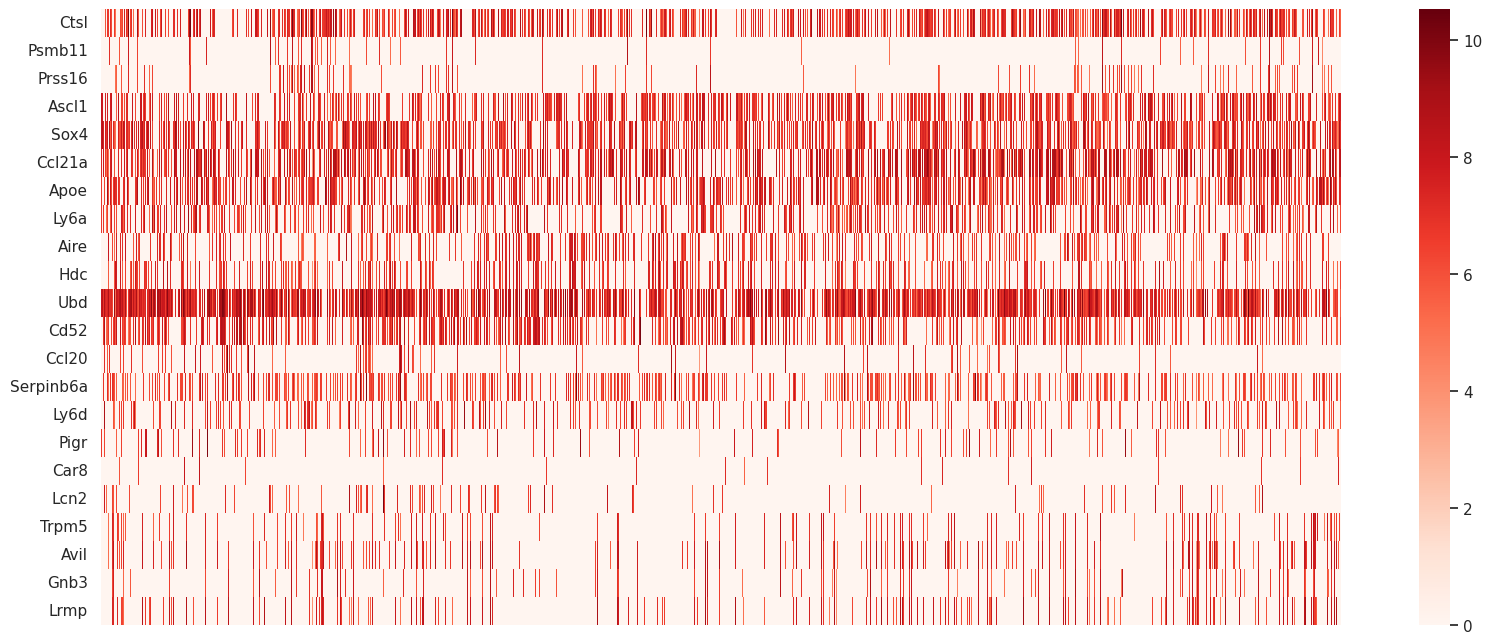

In [71]:
f, ax = plt.subplots(figsize=(20, 8))
ax = sns.heatmap(np.log(normalized_data.loc[markers] + 1), yticklabels=True, xticklabels=False, cmap='Reds')
plt.show()

# Шаг 4 Визуализируем все 2341 клетки на UMAP и PCA

Для этого предлагается использовать пакеты anndata (https://anndata-tutorials.readthedocs.io/en/latest/getting-started.html) и scanpy (https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html).

In [48]:
counts_norm = normalized_data

adata = ad.AnnData(counts_norm.T)
sc.pp.log1p(adata)

adata.var_names = list(counts_norm.index)
adata.obs_names = [f"Cell_{i:d}" for i in range(adata.n_obs)]

In [49]:
data = pd.read_csv(f'thymus_epithel_clusts.txt', sep='\t', index_col = 0)
cells_type_data = data.loc[list(counts), "group"]


In [50]:
# cells_type_data - cell type provided by authors
adata.obs["cell_type"] = list(cells_type_data)

In [51]:
sc.pp.pca(adata, n_comps=50)

In [52]:
colors = ['red', 'green', 'black', 'pink', 'orange']
cmap = get_cmap(ListedColormap(colors))

<ipython-input-52-06ed9cd57294>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap(ListedColormap(colors))


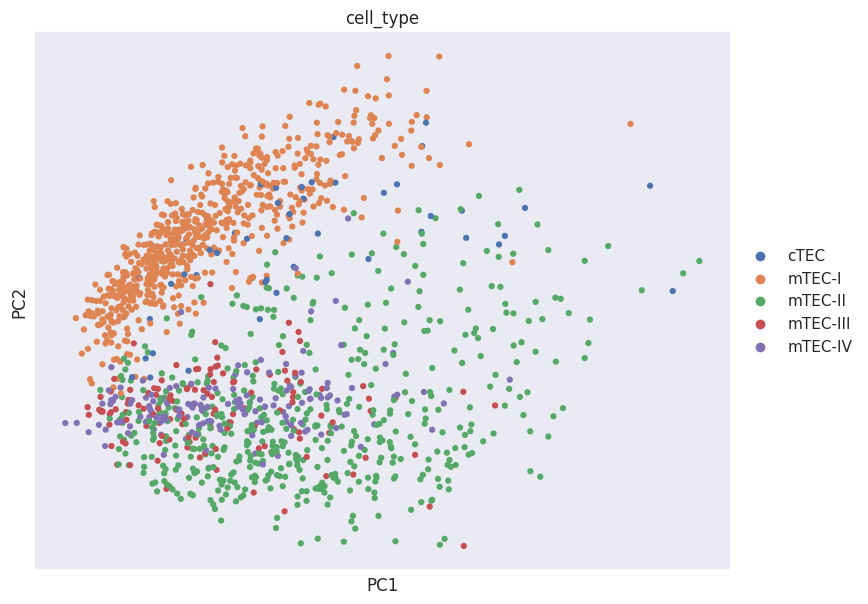

cTEC - red
cTEC - green
cTEC - black
cTEC - pink
cTEC - orange


In [72]:
f, ax = plt.subplots(figsize=(9, 7))
sc.pl.pca(adata, color=['cell_type'], colorbar_loc=None, color_map=cmap, ax=ax)
for i, c in enumerate(colors):
    print(f'{groups[i]} - {c}')

In [54]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

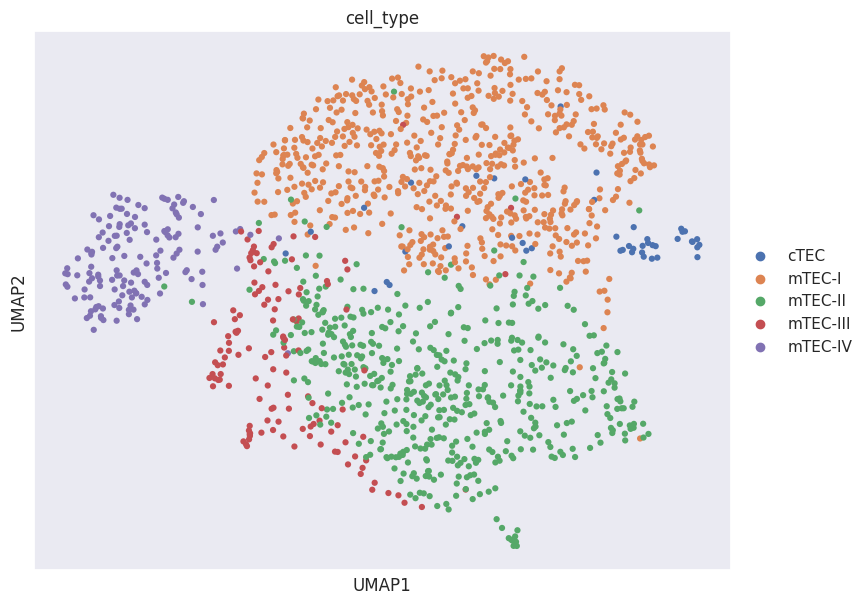

cTEC - red
cTEC - green
cTEC - black
cTEC - pink
cTEC - orange


In [73]:
f, ax = plt.subplots(figsize=(9, 7))
sc.pl.umap(adata, color=['cell_type'], colorbar_loc=None, color_map=cmap, ax=ax)
plt.show()
for i, c in enumerate(colors):
    print(f'{groups[i]} - {c}')

# Бонусная часть

In [56]:
! gdown 1jDnstauvQvZsm_89saoUKTVykSicZPc2
data_94 = pd.read_csv("SRR2038194.gene_name.counts", sep='\t', names=["Gene", "Counts"], index_col=0)
! gdown 1jMW6oEUJLk2snJOnxgRGBwVOjcmYrThe
data_95 = pd.read_csv("SRR2038195.gene_name.counts", sep='\t', names=["Gene", "Counts"], index_col=0)

Downloading...
From: https://drive.google.com/uc?id=1jDnstauvQvZsm_89saoUKTVykSicZPc2
To: /content/SRR2038194.gene_name.counts
100% 585k/585k [00:00<00:00, 110MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jMW6oEUJLk2snJOnxgRGBwVOjcmYrThe
To: /content/SRR2038195.gene_name.counts
100% 590k/590k [00:00<00:00, 85.0MB/s]


In [84]:
norm_data_94 = data_94 / data_94.sum() * 10**6
norm_data_95 = data_95 / data_95.sum() * 10**6
normalized = pd.concat([norm_data_94, norm_data_95], axis = 1)
normalized = normalized.mean(axis=1)

<Axes: xlabel='bulk', ylabel='mTEC-IV'>

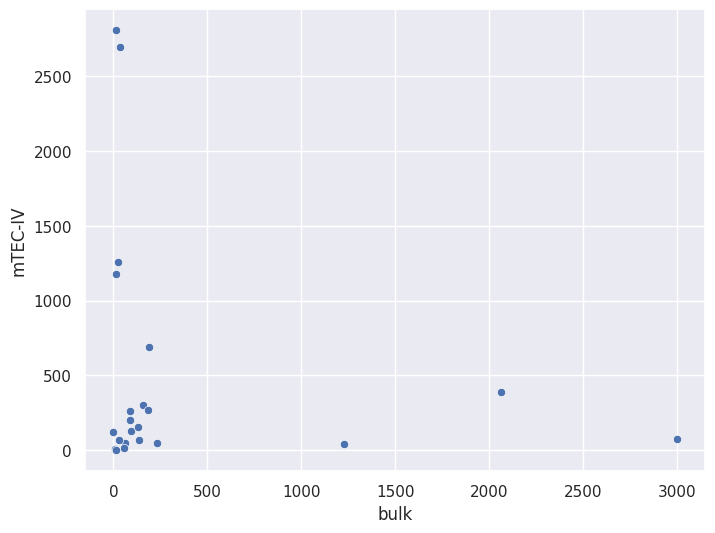

In [85]:
f, ax = plt.subplots(figsize=(9, 7))
sns.scatterplot(data=data.loc[markers], x="bulk", y="mTEC-IV", ax=ax)

<Axes: xlabel='bulk', ylabel='mTEC-IV'>

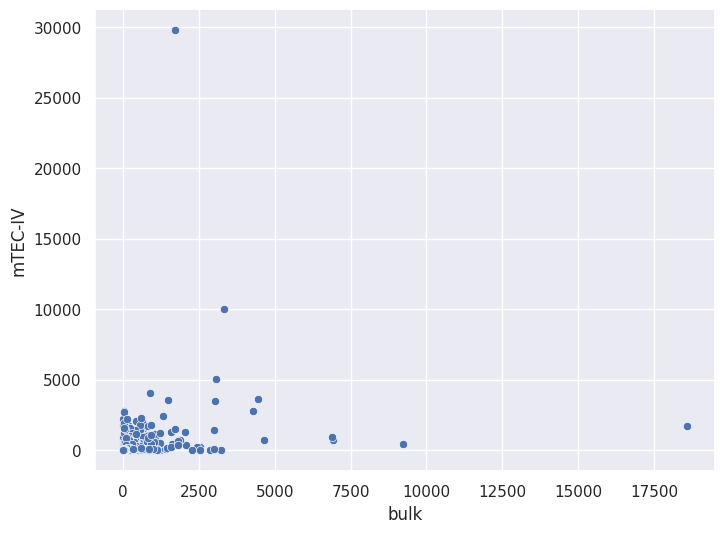

In [86]:
f, ax = plt.subplots(figsize=(9, 7))
sns.scatterplot(data=data, x="bulk", y="mTEC-IV", ax=ax)

<Axes: xlabel='mean', ylabel='diff'>

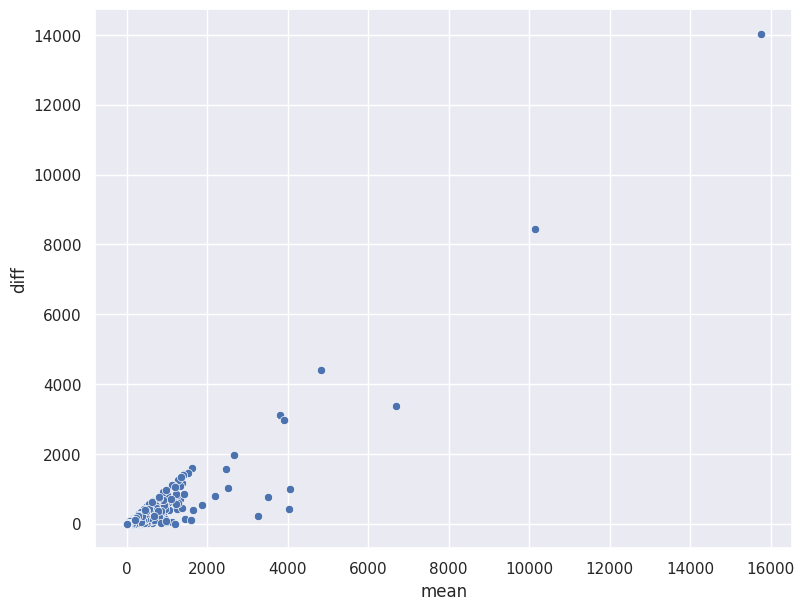

In [90]:
temp = data.assign(diff = abs(data["bulk"] - data["mTEC-IV"]) / 2)
temp = temp.assign(mean = abs(data["bulk"] + data["mTEC-IV"]) / 2)

f, ax = plt.subplots(figsize=(9, 7))
sns.scatterplot(data=temp, x="mean", y="diff", ax=ax)

<Axes: xlabel='bulk', ylabel='mTEC-IV'>

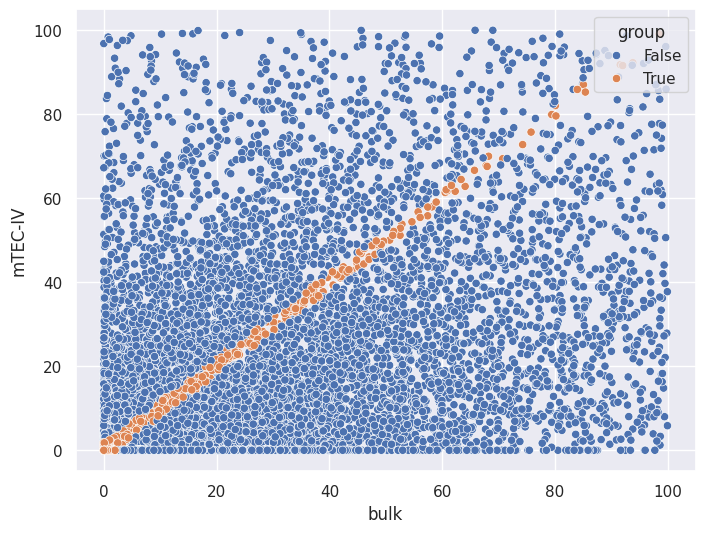

In [88]:
temp = data.assign(group = abs(data["bulk"] - data["mTEC-IV"]) / 2 < 1)
temp = temp[(temp["bulk"] < 100) & (temp["mTEC-IV"] < 100)]

f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=temp, x="bulk", y="mTEC-IV", hue="group", ax=ax)